### Relationship between mm of rainfall and number of car colisions by month in the region of Iztapalapa, Mexico City in 2016

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from simpledbf import Dbf5

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


We get the data of car colisions from the 2016's land traffic accidents in urban and suburban areas survey: https://www.inegi.org.mx/programas/accidentes/#Microdatos (availabe in the route data/atus_16_dbf/atus_2016.dbf, the documentation of this database is available in data/atus_16_dbf/)

In [5]:
dbf = Dbf5('data/atus_16_dbf/atus_2016.dbf', codec='utf-8')
df = dbf.to_dataframe()
df.head()

,EDO,MES,ANIO,MPIO,HORA,MINUTOS,DIA,DIASEMANA,URBANA,SUBURBANA,...,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO
0,5,1,2016,35,8,43,21,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,2016,35,9,5,21,4,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,2016,35,19,52,20,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,2016,35,20,15,20,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,2016,35,23,50,20,3,1,0,...,0,0,0,0,0,0,0,0,0,0


We're interested only in the region of Iztapalapa (EDO = 9) of Mexico City (MPIO = 7) and car colisions (TIPACCID = 1). The number of region and state were consulted here: https://www.gob.mx/cms/uploads/attachment/file/196925/Atenci_n_especial_2017.pdf (this file is available in the folder data/atus_16_dbf).

In [6]:
aux = df[(df['EDO'] == 9) & (df['MPIO'] == 7) & (df['TIPACCID'] == 1)]

Now, we aggregate the data by month and calculate the total of car accidents

In [7]:
aux = aux.groupby("MES").agg({"EDO":len})
aux.reset_index(inplace=True)
aux.rename(columns={"EDO":"Accident record", "MES":'Month'},inplace=True)
aux

,Month,Accident record
0,1,80
1,2,83
2,3,74
3,4,89
4,5,85
5,6,83
6,7,85
7,8,94
8,9,93
9,10,74


Now, the weather data are those collected by the Nezahualcoyotl's meteorologic station, the closest to the Iztapalapa region: https://smn.conagua.gob.mx/tools/RESOURCES/Diarios/15061.txt (available in data/15061.txt)

In [8]:
weather_data = pd.read_table('data/15061.txt', skiprows = 16751, skipfooter = 367, engine = 'python', sep = ' ')
weather_data.head()

,31/12/2015,Unnamed: 1,0,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Nulo,Unnamed: 8,Unnamed: 9,Unnamed: 10,27,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,10,Unnamed: 17
0,01/01/2016,NaN,0.0,NaN,NaN,NaN,NaN,Nulo,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,8.0,NaN
1,02/01/2016,NaN,0.0,NaN,NaN,NaN,NaN,Nulo,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,11.0,NaN
2,03/01/2016,NaN,0.0,NaN,NaN,NaN,NaN,Nulo,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,11.0,NaN
3,04/01/2016,NaN,2.3,NaN,NaN,Nulo,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
4,05/01/2016,NaN,0.0,NaN,NaN,NaN,NaN,Nulo,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,7.0,NaN


The '0' column correspond to mm of rainfall:

In [9]:
weather_data = weather_data[['31/12/2015','0']]
weather_data.rename(columns={'31/12/2015': 'Date', '0': 'Rainfall'},inplace=True)
weather_data.set_index("Date", inplace = True)
weather_data = weather_data.groupby(lambda x: re.split("/",x)[1]).agg({'Rainfall':np.nanmean})
weather_data.reset_index(inplace=True)
weather_data.rename(columns={"index":"Month"},inplace=True)
weather_data["Month"] = weather_data["Month"].apply(lambda x: int(x))
weather_data

,Month,Rainfall
0,1,0.206452
1,2,0.000000
2,3,0.406452
3,4,0.893333
4,5,2.622581
5,6,5.106667
6,7,4.022581
7,8,3.796774
8,9,1.613333
9,10,0.790323


Finally, we merge the two dataframes

In [10]:
data = weather_data.merge(aux, on = "Month")
data["Month"] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data

,Month,Rainfall,Accident record
0,Jan,0.206452,80
1,Feb,0.000000,83
2,Mar,0.406452,74
3,Apr,0.893333,89
4,May,2.622581,85
5,Jun,5.106667,83
6,Jul,4.022581,85
7,Aug,3.796774,94
8,Sep,1.613333,93
9,Oct,0.790323,74


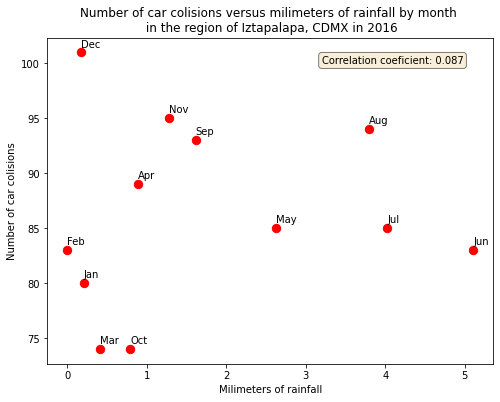

In [11]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(data["Rainfall"],data["Accident record"],c='r', s=70)
plt.xlabel('Milimeters of rainfall')
plt.ylabel('Number of car colisions')
plt.title('Number of car colisions versus milimeters of rainfall by month \n in the region of Iztapalapa, CDMX in 2016')
for i in range(0,len(data)):
    plt.annotate(data["Month"][i], (data["Rainfall"][i],data["Accident record"][i]+0.5))
corr = np.corrcoef(data["Rainfall"],data["Accident record"])
plt.text(3.2,100,"Correlation coeficient: "+str(round(corr[0,1],3)),bbox={'alpha': 0.5,'facecolor':'wheat','boxstyle':'round'})
plt.show()

This work was done as final assignement of the <a href="https://www.coursera.org/learn/python-plotting">Applied Plotting, Charting & Data Representation in Python</a> course.